#Recipe Classification for Diabetes Risk Factors
Panggih Kusuma Ningrum​, Elise Yang​, Ryan Young​, Diana ​

Diabetes is a large issue in the developed world. Everyone can share their recipes freely online. People can recreate these recipes. However, many people do it without having any knowledge of the nutrients contained in the recipes, and most of people have lack of knowledge of the potential health risk factors in the ingredients, specifically for people with a risk for diabetes.

We are looking to:


*   Categorize ingredients by risk factor, low/med/high, and see if this varies based on amount
*   Identify potential ingredient substitutions to make a dish a lower risk factor
*   Identify common ingredients in various cuisines or diets, to determine how that cuisine or diet as a whole affects diebetes risk



##Datesets:
The most essential dataset being used for this project is a [food ingredients dataset](https://www.kaggle.com/datasets/thedevastator/now-with-more-nutrients) from kaggle, which itself is a cleaned and redily usable extraction of the USDA's FoodData Central dataset. It includes a list of foods and all of its nutrients based on a 100 gram portion.

The others being used, [recipes/diet/cuisines](https://www.kaggle.com/datasets/thedevastator/healthy-diet-recipes-a-comprehensive-dataset), and [Indian foods and recipes](https://www.kaggle.com/datasets/kanishk307/6000-indian-food-recipes-dataset) are to be used for the classifaction side of things. To show what foods are healthy or not, and the differences in cuisines and diets.

###Preliminary Data Cleaning an Analysis:

In [12]:
#Relative imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
'''
If you upload the csv files to your google drive into a folder of the same name, "Hacklytics2023" it
should be able to mount to yours fine and no adjustment necessary. When uploading this to github, 
we can just adjust the name to whatever self folder it is and it should be fine.
'''
cleanedIngredients = pd.read_csv(open("/content/drive/My Drive/Hacklytics2023/cleaned_ingredients.csv"))
allDiets = pd.read_csv(open("/content/drive/My Drive/Hacklytics2023/All_Diets.csv"))
indianFood = pd.read_csv(open("/content/drive/My Drive/Hacklytics2023/IndianFoodDatasetCSV.csv"))


In [15]:
cleanedIngredients.dtypes

NDB_No               object
Descrip              object
Energy_kcal         float64
Protein_g           float64
Saturated_fats_g    float64
Fat_g               float64
Carb_g              float64
Fiber_g             float64
Sugar_g             float64
Calcium_mg          float64
Iron_mg             float64
Magnesium_mg         object
Phosphorus_mg       float64
Potassium_mg        float64
Sodium_mg           float64
Zinc_mg             float64
Copper_mcg          float64
Manganese_mg        float64
Selenium_mcg        float64
VitC_mg             float64
Thiamin_mg          float64
Riboflavin_mg       float64
Niacin_mg           float64
VitB6_mg            float64
Folate_mcg          float64
VitB12_mcg          float64
VitA_mcg            float64
VitE_mg              object
VitD2_mcg           float64
dtype: object

In [16]:
allDiets.dtypes

Diet_type           object
Recipe_name         object
Cuisine_type        object
Protein(g)         float64
Carbs(g)           float64
Fat(g)             float64
Extraction_day      object
Extraction_time     object
dtype: object

In [17]:
#dropping irrelevant columns
allDiets.drop(["Extraction_day", "Extraction_time"], axis=1, inplace=True)

In [18]:
indianFood.dtypes

Srno                       int64
RecipeName                object
TranslatedRecipeName      object
Ingredients               object
TranslatedIngredients     object
PrepTimeInMins             int64
CookTimeInMins             int64
TotalTimeInMins            int64
Servings                   int64
Cuisine                   object
Course                    object
Diet                      object
Instructions              object
TranslatedInstructions    object
URL                       object
dtype: object

In [19]:
#dropping irrelevant columns
indianFood.drop(["RecipeName", "Ingredients", "PrepTimeInMins", "CookTimeInMins", "TotalTimeInMins",
                 "Course", "Instructions", "TranslatedInstructions", "URL"], axis=1, inplace=True)

In [20]:
#data exploration
allDiets.head(5)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


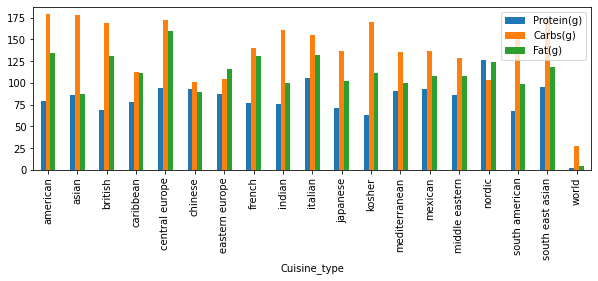

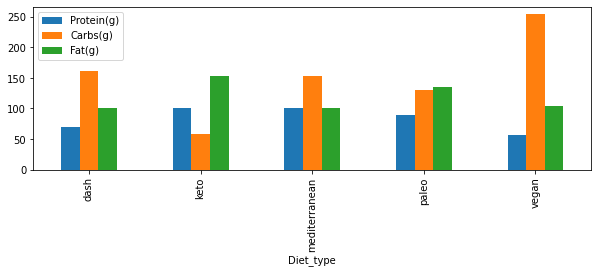

In [21]:
'''
I find these comparisons rather interesting actually, how as far as average goes, 
lots of diets and cruisines are generally similar
'''
allDiets.drop("Recipe_name", axis=1).groupby(["Cuisine_type"]).mean().plot.bar(figsize=(10, 3))
allDiets.drop("Recipe_name", axis=1).groupby(["Diet_type"]).mean().plot.bar(figsize=(10, 3))

In [22]:
cleanedIngredients['Risk Level (Men)'] = 0

def add_values(df, colname, newcolname, val, lowval, highval):
    extra_cond = df[newcolname] < val
    df.loc[((df[colname] >= lowval) & (df[colname] < highval) & (extra_cond)), newcolname] = val
    return df

cleanedIngredients = add_values(cleanedIngredients, 'Sugar_g', 'Risk Level (Men)', 0, 0, 30)
cleanedIngredients = add_values(cleanedIngredients, 'Sugar_g', 'Risk Level (Men)', 1, 30, 50)
cleanedIngredients = add_values(cleanedIngredients, 'Sugar_g', 'Risk Level (Men)', 2, 50, 1000)
    
cleanedIngredients = add_values(cleanedIngredients, 'Carb_g', 'Risk Level (Men)', 0, 0, 50)
cleanedIngredients = add_values(cleanedIngredients, 'Carb_g', 'Risk Level (Men)', 1, 50, 80)
cleanedIngredients = add_values(cleanedIngredients, 'Carb_g', 'Risk Level (Men)', 2, 80, 100)

cleanedIngredients = add_values(cleanedIngredients, 'Saturated_fats_g', 'Risk Level (Men)', 0, 0, 20)
cleanedIngredients = add_values(cleanedIngredients, 'Saturated_fats_g', 'Risk Level (Men)', 1, 20, 40)
cleanedIngredients = add_values(cleanedIngredients, 'Saturated_fats_g', 'Risk Level (Men)', 2, 40, 1000)

cleanedIngredients = add_values(cleanedIngredients, 'Fat_g', 'Risk Level (Men)', 0, 0, 30)
cleanedIngredients = add_values(cleanedIngredients, 'Fat_g', 'Risk Level (Men)', 1, 30, 50)
cleanedIngredients = add_values(cleanedIngredients, 'Fat_g', 'Risk Level (Men)', 2, 50, 1000)

print('Count of Low-risk Ingredients:', len(cleanedIngredients[cleanedIngredients['Risk Level (Men)'] == 0]))
print('Count of Mid-risk Ingredients:', len(cleanedIngredients[cleanedIngredients['Risk Level (Men)'] == 1]))
print('Count of High-risk Ingredients:',len(cleanedIngredients[cleanedIngredients['Risk Level (Men)'] == 2]))

Count of Low-risk Ingredients: 6886
Count of Mid-risk Ingredients: 1610
Count of High-risk Ingredients: 822


In [23]:
X, y = cleanedIngredients[['Saturated_fats_g', 'Fat_g', 'Carb_g', 'Sugar_g']], cleanedIngredients['Risk Level (Men)']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

# linear regression model and model accuracy
regr = LinearRegression().fit(X_train, y_train)
print("Accuracy Score: ", regr.score(X_test, y_test))


Accuracy Score:  0.7717756868291276
